## Variables and terminology
- Regression: predict quatitative outputs
- Classification: predict qualitative outputs
### Input variable type
- qualitative input
- quantitiative input
- ordered categorical 

## Linear models and Least Squares
### Least Square
- Model: $\hat{Y} = X^T\hat{\beta}$
- $\hat{\beta}$ is determined as $\hat{\beta}=(X^TX)^{-1}X^Ty$
Model effectiveness:
- Scenario 1: Training data are Gaussian
- Scenario 2: Tightly clusted Gaussian. *LS is usually not optimal*

### Nearest-Neighbor Methods
The k-nearest neightbor fit for $\hat{Y}$ is defined as $\hat{Y}(x)=1/k \sum_{x_i \in N_k(x)}
y_i$

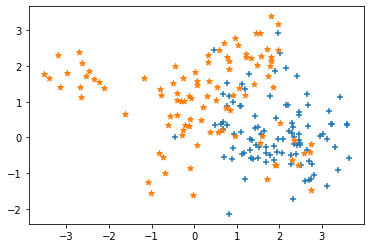

In [1]:
# Example figure 2.1
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
NN = 10
np.random.seed(0)
mean_blue = np.array([1,0])
#print(mean)
col_blue = np.eye(2)/1
blue_out = np.random.multivariate_normal(mean_blue,col_blue,10)
mean_orange = np.array([0,1])
orange_out = np.random.multivariate_normal(mean_orange,col_blue,10)
sel_index = np.random.randint(10,size=100)
blue_sample = np.empty([1,2])
#print(blue_sample)
col_sample = np.eye(2)/5
for  ii in sel_index:
    mean_sample = blue_out[ii,:]
    temp = np.random.multivariate_normal(mean_sample,col_sample,1)
    blue_sample = np.concatenate((blue_sample,temp),axis=0)
blue_sample = blue_sample[1:101,:]
orange_sample = np.empty([1,2])
for  ii in sel_index:
    mean_sample = orange_out[ii,:]
    temp_sample = np.random.multivariate_normal(mean_sample,col_sample,1)
    orange_sample = np.concatenate((orange_sample,temp_sample),axis=0)
orange_sample = orange_sample[1:101,:]
#print(sel_index)
plt.scatter(blue_sample[:,0],blue_sample[:,1],marker='+')
plt.scatter(orange_sample[:,0],orange_sample[:,1],marker='*')
plt.show()

In [2]:
# print(blue_sample)
qq = np.ones((100,1))
zz = np.zeros((100,1))
blue_sample0 = np.hstack((blue_sample,qq))
orange_sample0 = np.hstack((orange_sample,qq))
X_data = np.vstack((blue_sample0,orange_sample0))
Y_data = np.vstack((qq,zz))
beta = linalg.inv(X_data.T @ X_data) @ (X_data.T)@Y_data
print(beta)
#print(blue_sample)   

[[ 0.15897292]
 [-0.11191685]
 [ 0.40117693]]


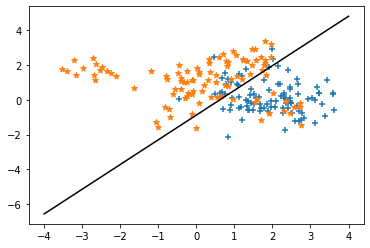

In [3]:
x = np.linspace(-4,4,100)
y = beta[0]*x/(-beta[1])+(beta[2]-0.5)/(-beta[1])
plt.scatter(blue_sample[:,0],blue_sample[:,1],marker='+')
plt.scatter(orange_sample[:,0],orange_sample[:,1],marker='*')
plt.plot(x,y,'k')
plt.show()

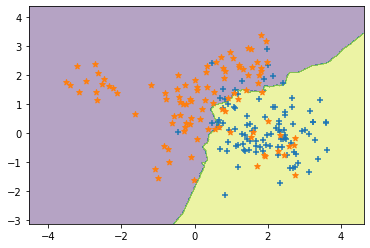

In [4]:
from sklearn import neighbors
n_neighbors = 20
h = 0.02
X_train = np.vstack((blue_sample,orange_sample))
Y_train = np.vstack((qq,zz))
Y_train = Y_train.ravel()
#print(Y_train)
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X_train,Y_train)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))                       
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(blue_sample[:,0],blue_sample[:,1],marker='+')
plt.scatter(orange_sample[:,0],orange_sample[:,1],marker='*')
plt.show()

## Statistical Decision
### Squared Error Loss
\begin{align}
\text{EPE}(f)= & \text{E}(Y-f(X))^2\\
& = \int [y-f(x)]^2 \text{Pr}(dx,dy)\\
& = \text{E}_{X}\text{E}_{Y|X}([Y-f(X)]^2|X)
\end{align}
Thus, we have 
\begin{align}
f(x) &= argmin_c \text{E}_{Y|X}([Y-C]^2|X=x)\\
& = \text{E}(Y|X=x)
\end{align}
#### Approximation og Nearest-Neighbor method
- Expectation is approximated by smaple data averaging
- Condition at a point is approximated by condition at neighborhood
#### Approximation of LS method
- Assume $f(X)=\beta^TX$

### $L_1$ Loss Function
\begin{equation}
\hat{f}(x)=\text{median}(Y|X=x)
\end{equation}

### Bayes Classifier
- Expected prediction error for categorical variable
\begin{align}
\text{EPE} & = \text{E}_X \sum_{k=1}^{K} L[\mathcal{G}_k,\hat{G}(X)]\text{Pr}(\mathcal{G}_k|X)
\end{align}
Thus, we obtain
\begin{equation}
\hat{G}(x)=argmin_{g \in \mathcal{G}}\sum_{k=1}^{K} L[\mathcal{G}_k,\hat{G}(X)]\text{Pr}(\mathcal{G}_k|X)
\end{equation}
With the 0-1 loss function
\begin{align}
\hat{G}(x) &= argmin_{g \in \mathcal{G}}[1-\text{Pr}(g|X=x)] \\
&= \text{max}_{g \in \mathcal{G}}\text{Pr}(g|X=x)
\end{align}

### Exercise 2.2:
On the boundary, we have
\begin{equation}
\text{Pr}(B|X)=\text{Pr}(Y|X)
\end{equation}
Assume $\text{Pr}(B)=\text{Pr}(Y)$, we get
\begin{equation}
\text{Pr}(X|B)=\text{Pr}(X|Y)
\end{equation}
so that we have 
\begin{equation}
\sum_{k}e^{-\frac{5|x-m_k|^2}{2}}=\sum_{k}e^{-\frac{5|x-n_k|^2}{2}}
\end{equation}

-2.7708827199971737
[0 1 2 3 4 5 6 7 8 9]


(-1.0, 3.0)

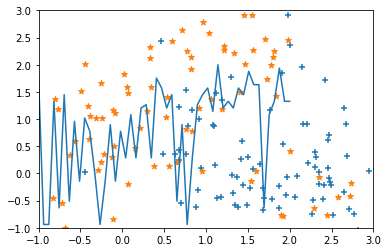

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
np.random.seed(0)
def costFunc(x,y):
    NN = 10
    mean_blue = np.array([1,0])
    col_blue = np.eye(2)/1
    blue_out = np.random.multivariate_normal(mean_blue,col_blue,10)
    mean_orange = np.array([0,1])
    orange_out = np.random.multivariate_normal(mean_orange,col_blue,10)
    input_vec = np.array([x,y])
    right_val = 0
   # print(blue_out[0:10])
    for ii in np.arange(0,10):
        right_val =  right_val+np.exp(-2.5*(input_vec-blue_out[ii]).T@(input_vec-blue_out[ii]))
    left_val = 0
    for ii in np.arange(0,10):
        left_val =  left_val+np.exp(-2.5*(input_vec-orange_out[ii]).T@(input_vec-orange_out[ii]))
    return right_val-left_val
qq = costFunc(0,1)
print(qq)
ss= np.arange(0,10)
print(ss)
x = np.linspace(-1, 2, 50)
y = np.linspace(-1, 2, 50)
y_sel = y
for jj in np.arange(0,50):
    temp_val = np.ones(50)
    for ii in np.arange(0,50):
        temp_val[ii]= costFunc(x[jj],y[ii])
    temp_val = np.absolute(temp_val)
    ind0 = np.argmin(temp_val)
   # print(np.min(temp_val))
    y_sel[jj]=y[ind0]
#plt.plot(temp_val)       
#plt.contour(X, Y, Z, colors='black')
NN = 10
np.random.seed(0)
mean_blue = np.array([1,0])
#print(mean)
col_blue = np.eye(2)/1
blue_out = np.random.multivariate_normal(mean_blue,col_blue,10)
mean_orange = np.array([0,1])
orange_out = np.random.multivariate_normal(mean_orange,col_blue,10)
sel_index = np.random.randint(10,size=100)
blue_sample = np.empty([1,2])
#print(blue_sample)
col_sample = np.eye(2)/5
for  ii in sel_index:
    mean_sample = blue_out[ii,:]
    temp = np.random.multivariate_normal(mean_sample,col_sample,1)
    blue_sample = np.concatenate((blue_sample,temp),axis=0)
blue_sample = blue_sample[1:101,:]
orange_sample = np.empty([1,2])
for  ii in sel_index:
    mean_sample = orange_out[ii,:]
    temp_sample = np.random.multivariate_normal(mean_sample,col_sample,1)
    orange_sample = np.concatenate((orange_sample,temp_sample),axis=0)
orange_sample = orange_sample[1:101,:]
#print(sel_index)
plt.scatter(blue_sample[:,0],blue_sample[:,1],marker='+')
plt.scatter(orange_sample[:,0],orange_sample[:,1],marker='*')
plt.plot(x,y_sel)
plt.xlim(-1,3)
plt.ylim(-1,3)

### Exercise 2.3:
The probability of a point with distance to origin less than $r$ is $r^p$.
Thus for $N$ point, the minimum distance less than $r$ is written as $(1-r^p)^N$.
For media minimum distance, we have 
\begin{equation}
1-(1-r^p)^N = 1/2
\end{equation}
Thus, we have $d(p,N)=(1-(1/2)^{1/N})^{1/p}$

### Local Methods in High Dimensions
- Neighborhoods are no longer local
    - Expected edge length of a fraction $r$ of the unit p-dimensional hypercube with uniform distribution
- All sample points are close to an edge of the sample
- In high dimensions, all feasible training samples sparsely populate the input space

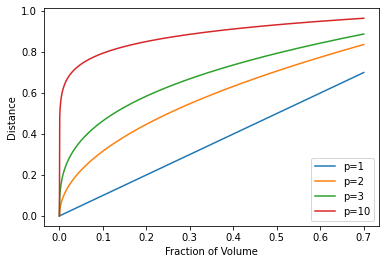

In [11]:
import numpy as np
import matplotlib.pyplot as plt
p = np.array([1,2,3,10])
r= np.linspace(0,0.7,1000)
y = np.zeros((4,1000))
for ii in np.arange(0,4):
    y[ii,:] = np.power(r,1/p[ii])
for ii in np.arange(0,4):
    plt.plot(r,y[ii,:],label=f'p={p[ii]}')
plt.xlabel('Fraction of Volume')
plt.ylabel('Distance')
plt.legend()
plt.show()

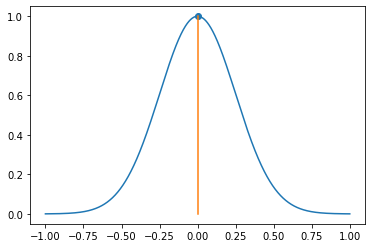

In [30]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
xx = np.linspace(-1,1,10000)
yy = np.exp(-8*(np.absolute(xx)**2))
aa = np.random.uniform(-1,1,(1,1000))
plt.plot(xx,yy)
#plt.show()
aa_min = np.min(np.absolute(aa))
#print(aa_min)
yy_min = np.exp(-8*(aa_min**2))
#print(yy_min)

yy_ver = np.linspace(0,yy_min,1000,endpoint=True)
xx_ver = np.ones(1000)*aa_min
plt.plot(xx_ver,yy_ver)
plt.scatter(aa_min,yy_min)
plt.show()
#print(xx_ver)

In [2]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(X)
distances, indices = nbrs.kneighbors(X)
print(indices)

[[0 1]
 [1 0]
 [2 1]
 [3 4]
 [4 3]
 [5 4]]


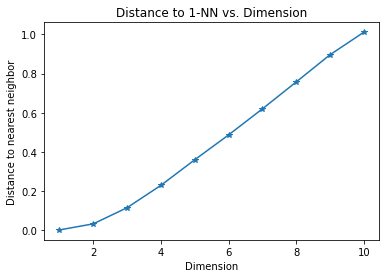

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
np.random.seed(0)
aver_dis = np.zeros(10)
for p in np.arange(1,11,1):
    x_data = np.random.uniform(-1,1,(1000,p))
    #print(x_data)
    nbrs = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(x_data)
    distances,indices = nbrs.kneighbors(x_data)
    distances = distances[:,1]
    aver_dis[p-1] = np.mean(distances)
plt.plot(np.arange(1,11,1),aver_dis,'-*')
plt.xlabel('Dimension')
plt.ylabel('Distance to nearest neighbor')
plt.title('Distance to 1-NN vs. Dimension')
plt.show()
    

#### Figure 2.7
- Training samples generated uniformly on $\begin{bmatrix} -1,1 \end{bmatrix}^p$
- Use the 1-NN rule to predict $y_0$ at the  test-point $x_0=0$. Denote the training set by $\mathcal{\tau}$ 
\begin{align}
\text{MSE}(x_0) & = \text{E}_{\tau}[f(x_0)-\hat{y}_0]^2 \\
& = \text{E}_{\tau}[\hat(y)_0-\text{E}_{\tau}(\hat{y}_0)]^2 + [\text{E}_{\tau}(\hat{y}_0)-f(x_0)]^2 \\
& = \text{Var}_{\tau}(\hat{y}_0)+\text{Bias}^2(\hat{y}_0)
\end{align}

[[0.09762701]
 [0.43037873]
 [0.20552675]]
[[ 0.08976637]
 [-0.1526904 ]
 [ 0.29178823]]


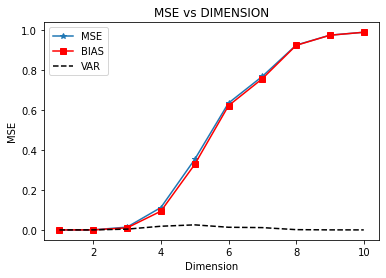

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
p = np.arange(1,11)
xx = np.random.uniform(-1,1,(3,1))
xx1=  np.random.uniform(-1,1,(3,1))
#xx_abs = np.diag(xx@xx.T)
print(xx)
print(xx1)
MSE = np.zeros(10)
BIAS = np.zeros(10)
VAR = np.zeros(10)
for ii in p:
    y_hat = np.zeros(100)
    for jj in np.arange(1,101):
        x_train = np.random.uniform(-1,1,(1000,ii))
        norm_x = np.diag(x_train@x_train.T)
        norm_x = np.min(norm_x)
        y_hat[jj-1] = np.exp(-8*norm_x)
    BIAS[ii-1] = (np.mean(y_hat)-1)**2
    MSE[ii-1] = (y_hat-1)@(y_hat-1).T/100
    VAR[ii-1] = np.var(y_hat)
plt.plot(p,MSE,'-*',label='MSE') 
plt.plot(p,BIAS,'r-s',label='BIAS')
plt.plot(p,VAR,'k--',label='VAR')
plt.legend()
plt.xlabel('Dimension')
plt.ylabel('MSE')
plt.title('MSE vs DIMENSION')
plt.show()


### Ex2.5
For linear model 
\begin{equation}
Y = X^T \beta + \epsilon
\end{equation} 
with $\epsilon \: \sim  \: \mathrm{N}(0,\sigma^2)$. Then we have the estimation of $\beta$ denoted as $\hat{\beta}$. We denote each row of $\mathbf{X}$ corresponding to each training vector $x_i^T$. 
\begin{align}
\hat{\beta} & = (\mathbf{X}^T \mathbf{X}) ^{-1} \mathbf{X}^T\mathbf{Y} \\
& = \beta + (\mathbf{X}^T \mathbf{X}) ^{-1} \mathbf{X}^T\mathbf{\epsilon} 
\end{align}
For expected error at $x_0$, we have 
\begin{align}
\text{EPE}(x_0) & = \text{E}_{y_0|x_0}\text{E}_{\tau}(y_0-\hat{y_0})^2 \\
& = \text{E}_{y_0|x_0}\text{E}_{\tau}(y_0-x_0^T \beta +x_0^T \beta-\hat{y_0})^2 \\
& = \text{E}_{y_0|x_0}(y_0-x_0^T \beta)^2 + \text{E}_{\tau}(x_0^T \beta-\hat{y_0})^2 + 2\text{E}_{y_0|x_0}\text{E}_{\tau}(y_0-x_0^T \beta )(x_0^T \beta-\hat{y_0}) \\
& = \text{Var}(y_0| x_0) +Var_{\tau}(\hat(y_0)) \\
& = \sigma^2 + x_0 ^T (\mathbf{X}^T \mathbf{X})^{-1}x_0 \sigma ^2
\end{align}
Assuming $N$ is sufficiently large, $\tau$ are selected randomly and $\text{E}(X)=0$, then $\mathbf{X}^T \mathbf{X} \rightarrow N\text{Cov}(X)$
\begin{align}
\text{E}_{x_0}\text{EPE}(x_0) & \sim \text{E}_{x_0}x_0^T \text{Cov}(X)^{-1}x_0 \sigma ^2 /N + \sigma ^2 \\
& = \text{trace}[\text{Cov}(X)^{-1}\text{Cov}(x_0)]\sigma^2 /N + \sigma ^2 \\
& = \sigma^2 \text{trace}[I_p] + \sigma^2 \\
& = (p/N)\sigma^2 + \sigma^2
\end{align}